In [25]:
import pandas as pd 
import numpy as np
import plotly.express as plt
import xgboost as xgb
import optuna 
from optuna import Trial
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [13]:
data=pd.read_csv(r"C:\Users\Shivam\Desktop\sleeptime_prediction_dataset.csv")
data.sample(5)

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
14,0.55,1.06,3.57,6.73,203.12,1.01,3.76
393,2.33,0.29,1.18,8.16,214.70,1.09,5.29
818,0.16,0.02,4.55,9.16,173.12,0.40,3.00
1337,2.04,1.52,3.28,5.61,292.80,0.36,4.82
1441,0.28,1.06,1.87,4.45,31.34,1.09,5.93


In [16]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)
finaldata=pd.DataFrame(scaled_data,columns=['WorkoutTime','ReadingTime','PhoneTime','WorkHours',
                                            'CaffeineIntake','RelaxationTime','SleepTime'])
finaldata.head()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
0,-0.428921,-0.819160,0.264705,0.558807,0.810425,-0.448012,-0.707151
1,1.545018,-0.871139,1.072356,-1.100692,0.693445,-0.585357,-0.002157
2,0.803365,1.415929,0.916036,1.336335,-1.403330,-1.134738,-0.628271
3,0.346963,-0.853813,-1.185592,0.436956,1.527546,0.341724,0.027423
4,-1.170574,-0.784507,-1.202961,-1.152914,0.272317,-0.104648,0.303505


In [20]:
df=finaldata.drop(['CaffeineIntake'],axis=1)
df.head()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,RelaxationTime,SleepTime
0,-0.428921,-0.819160,0.264705,0.558807,-0.448012,-0.707151
1,1.545018,-0.871139,1.072356,-1.100692,-0.585357,-0.002157
2,0.803365,1.415929,0.916036,1.336335,-1.134738,-0.628271
3,0.346963,-0.853813,-1.185592,0.436956,0.341724,0.027423
4,-1.170574,-0.784507,-1.202961,-1.152914,-0.104648,0.303505


In [22]:
df2=df[(df['SleepTime']<2) & (df['SleepTime']>-2)]
df2.shape

(1945, 6)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(df2.iloc[:,[0,1,2,3,4]],df2.iloc[:,-1],test_size=0.15)

In [62]:
def objective1(trial):
    learning_rate=trial.suggest_float('learning_rate',0.001,0.3)
    n_estimators=trial.suggest_int('n_estimators',50,300)
    max_depth=trial.suggest_int('max_depth',3,15)
    colsample_bytree=trial.suggest_float('colsample_bytree',0.3,1)
    subsample=trial.suggest_float('subsample',0.5,1)
    gamma=trial.suggest_float('gamma',0,5)
    reg_alpha=trial.suggest_float('reg_alpha',0.01,10)
    reg_lambda=trial.suggest_float('reg_lambda',0.01,10)
   
    model1=xgb.XGBRegressor(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        colsample_bytree=colsample_bytree,
        subsample=subsample,
        gamma=gamma,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda
    )
    score1=cross_val_score(model1,x_train,y_train,scoring='r2',cv=3).mean()
    return score1

In [71]:
study1=optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler())
study1.optimize(objective1,n_trials=300)

[I 2025-01-21 15:13:21,433] A new study created in memory with name: no-name-b14a4742-765b-4e5b-9651-a6ae67263b4e
[I 2025-01-21 15:13:21,690] Trial 0 finished with value: 0.6832024708584262 and parameters: {'learning_rate': 0.26613687352638354, 'n_estimators': 54, 'max_depth': 9, 'colsample_bytree': 0.43375945825232887, 'subsample': 0.7027495832423177, 'gamma': 4.076169348626989, 'reg_alpha': 8.741273301850855, 'reg_lambda': 6.780532483654557}. Best is trial 0 with value: 0.6832024708584262.
[I 2025-01-21 15:13:21,912] Trial 1 finished with value: 0.6968172138207113 and parameters: {'learning_rate': 0.2609139600834033, 'n_estimators': 181, 'max_depth': 11, 'colsample_bytree': 0.8336195941604962, 'subsample': 0.8919264230427653, 'gamma': 4.860159272415174, 'reg_alpha': 6.680867328473507, 'reg_lambda': 7.601238208998762}. Best is trial 1 with value: 0.6968172138207113.
[I 2025-01-21 15:13:22,135] Trial 2 finished with value: 0.6434928166155588 and parameters: {'learning_rate': 0.08952434

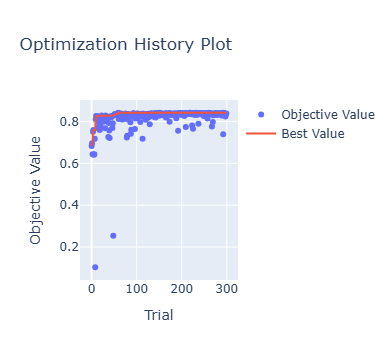

In [73]:
from optuna.visualization import plot_optimization_history
plot_optimization_history(study1).show()

In [75]:
print(study1.best_params)

{'learning_rate': 0.11345619135735525, 'n_estimators': 215, 'max_depth': 3, 'colsample_bytree': 0.5817834317519104, 'subsample': 0.6463506342863008, 'gamma': 0.008668501190736403, 'reg_alpha': 3.2250273718536215, 'reg_lambda': 4.6377224555130026}


In [77]:
print(study1.best_value)

0.8421354258358645
